<a href="https://colab.research.google.com/github/lisahqwang/ML-DL-CV/blob/main/HandwrittenDigitClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Block 1 - Imports




In [1]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

# Block 2 - Load data from MNIST dataset


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


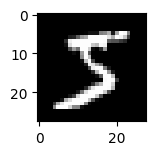

In [5]:
(trainX, trainY), (testX, testY) = mnist.load_data()
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))

pyplot.subplot(330 + 1 )
pyplot.imshow(trainX[0], cmap=pyplot.get_cmap('gray'))
pyplot.show()

# Block 3 - Pre-processing


In [6]:

# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

# one hot encode target values - since output is vector of 10 values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))

# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')

# normalize to range 0-1
trainX = train_norm / 255.0
testX = test_norm / 255.0

Train: X=(60000, 28, 28, 1), y=(60000, 10)
Test: X=(10000, 28, 28, 1), y=(10000, 10)


# Block 4 - Model Definition


In [7]:
def define_model():
  model = Sequential()

  # Convolution layer with 32 kernels of [3*3]
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  # Max Pooling with [2*2]
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())

  # First layer of Fully connected layer with 100 nodes
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  # Output layer with 10 nodes
  model.add(Dense(10, activation='softmax'))

  # compile model
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

  return model

# Block 5 - Model Evaluation


In [8]:
scores, histories = list(), list()

# 2 fold cross validation
kfold = KFold(2, shuffle=True, random_state=1)

# enumerate splits
for train_ix, test_ix in kfold.split(trainX):
	model = define_model()
	# select rows for train and test
	trainX_temp, trainY_temp, testX_temp, testY_temp = trainX[train_ix], trainY[train_ix], trainX[test_ix], trainY[test_ix]
	# fit model
	history = model.fit(trainX_temp, trainY_temp, epochs=10, batch_size=32, validation_data=(testX_temp, testY_temp), verbose=0)
	# evaluate model
	_, acc = model.evaluate(testX_temp, testY_temp, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# stores scores
	scores.append(acc)
	histories.append(history)



> 98.320
> 98.383


# Block 6 - Plot learning curves


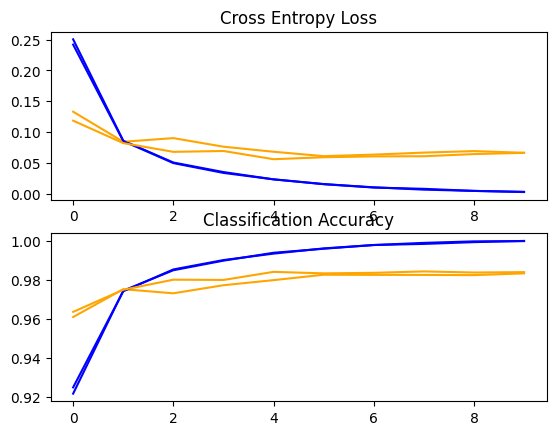

In [9]:
# Block 7 - Plot learning curves

for i in range(len(histories)):
	# plot loss
	pyplot.subplot(2, 1, 1)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(histories[i].history['loss'], color='blue', label='train')
	pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')

	# plot accuracy
	pyplot.subplot(2, 1, 2)
	pyplot.title('Classification Accuracy')
	pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
	pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
pyplot.show()

# Block 7 - Summarise model performance


Accuracy: mean=98.352 std=0.032, n=2


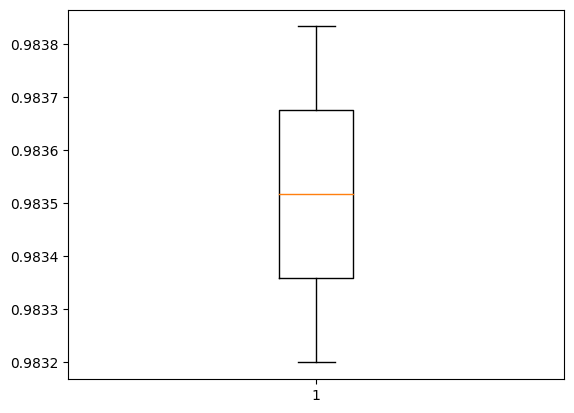

In [10]:
print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
# box and whisker plots of results
pyplot.boxplot(scores)
pyplot.show()

# Block 8 - Final evaluation


In [ ]:
model = define_model()
model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=0)
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))
